<div style="display: flex; justify-content: flex-start">

<img
     src="Icone_lapage.png"
     alt="logo_lapage"
     WIDTH= 250px
     padding= 7px>

<h1  style="margin: auto; 
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif"
    > Exploration et nettoyage des données </h1> </div>

<h2  style= "background-color: #d4bdcf;
                 color: white;
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif"> Étude réalisée par Alhassane AHMED</h2>




<nav><ul style="display: flex;
    justify-content: space-between;
    background-color: #945f8a;
    font-family:Helvetica, Arial, verdana, sans-serif;
    font-size:11pt">
    
<li style="margin: auto;color: RGB(255,255,255);"> <a style="color: RGB(255,255,255)"; href="#C1"><strong>Introduction</strong> </a> </li>
<li style="margin: auto;color: RGB(255,255,255);"> <a style="color: RGB(255,255,255)"; href="#C2"><strong>Utilitaires</strong></a> </li>
<li style="margin: auto;color: RGB(255,255,255);"> <a style="color: RGB(255,255,255)"; href="#C3"><strong>Customers</strong></a> </li>
<li style="margin: auto;color: RGB(255,255,255);"> <a style="color: RGB(255,255,255)"; href="#C4"><strong>Products</strong></a> </li>
<li style="margin: auto;color: RGB(255,255,255);"> <a style="color: RGB(255,255,255)"; href="#C5"><strong>Transactions</strong></a> </li>
<li style="margin: auto;color: RGB(255,255,255);"> <a style="color: RGB(255,255,255)"; href="#C6"> <strong>Fusion</strong> </a> </li>
<li style="margin: auto;color: RGB(255,255,255);"> <a style="color: RGB(255,255,255)"; href="#C7"><strong>Conclusion</strong></a></li>
</ul></nav>

<h2  style="margin: auto; 
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif"><a name="C1"> Introduction </a> </h2>
<br>

Ce projet est une analyse des points forts, des points faibles ainsi que des comportements clients de Lapage.

Nous avons trois fichiers à notre disposition, à savoir :
- customers qui donne des informations sur les clients
- products des informations sur les produits
- transactions des opérations de vente.

L'objet de cette première partie est d'explorer, nettoyer et préparer les données.

Plan d'action:

1. Préparer les fonctions utiles
2. Importer les données
3. Explorer et nettoyer les données
4. Fusionner les jeux de données

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import datetime as dt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style("white")

<h2 style="margin: auto; 
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif"><a name="C2"> Utilitaires </a></h2>

In [5]:
# On définit une fonction qui check les doublons dans une colonne et nous indique le nombre de doublons contenus dans cette colonne suivi d'un aperçu de ces doulons.
def check_duplicates(data, column):
    n = len(data.index)
    if len(data[column].drop_duplicates()) == n :
        print ("La colonne", column, "ne contient pas de doublons")
    else :
        if len(column) == 1:
            print("La clé", column, "contient ", len(data[data[column].duplicated()]), " doublons.")
        else:
            print("La clé composée des colonnes", column, "contient ", len(data[data[column].duplicated()]), " doublons.")
        return data[data[column].duplicated()]

# On définit une fonction qui check les valeurs manquantes et indique le nombre de valeurs manquantes contenues dans cette colonne suivi d'un aperçu de ces valeurs manquantes.
def check_nan(data, column):
    if len(data[data[column].isnull()]) == 0:
        print ("La colonne", column, "ne contient aucune valeur manquante")
    else :
        print("La colonne", column, "contient ", len(data[data[column].isnull()]), " valeurs manquantes.")


# On définit une fonction qui detecter les outliers
outliers=[]
def check_outliers(data):
    threshold = 2
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i- mean)/std
        if z_score > threshold:
            outliers.append(i)
    print("Le nombre d'outliers détectés  " + str(len(outliers)))

from itertools import chain, combinations
def cles_potentielles(df, max_allowed=10):
    combi_list = chain.from_iterable( combinations(list(df), x) for x in range(1, len(list(df))+1) )
    found = 0
    for candidate in combi_list:
        tmp = df.drop_duplicates(candidate)
        if len(tmp) == len(df):
            print( list(candidate) )
            found +=1
        if found > max_allowed:
            print( 'Nombre maximum autorisé atteint.', end=' ')
            print( 'Veuillez augmenter cette valeur si vous voulez rechercher davantage de clés primaires candidates.' )
            return
    if found == 0:
        print('''Aucune clé primaire, simple ou composée, n'a pu être trouvée ! Il y a forcément des doublons.''')

<h2 style="margin: auto; 
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif"><a name="C3"> Customers </a></h2>

In [6]:
customers = pd.read_csv("customers.csv")
print('-'*70)
print('Apérçu des données :')
display(customers.head())
print('-'*70, "\n")
print('Format des colonnes :',"\n")
print(customers.dtypes, "\n")
print('-'*70,"\n")
print("Informations:","\n")
print(customers.info())

----------------------------------------------------------------------
Apérçu des données :


,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


---------------------------------------------------------------------- 

Format des colonnes : 

client_id    object
sex          object
birth         int64
dtype: object 

---------------------------------------------------------------------- 

Informations: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB
None



<div class="alert-info">
    <ul>
        <li><strong>Customers</strong> donne des informations sur le profil des clients.</li>
      <li>On distingue 3 variables (suposées qualitatives) dans le jeu de données : sex, birth et client_id</li>
      <li>Il y a en total 8623 clients enregistrés</li>
    </ul>
</div>
<br>

In [7]:
# La clé primaire
cles_potentielles(customers)

['client_id']
['client_id', 'sex']
['client_id', 'birth']
['client_id', 'sex', 'birth']


In [8]:
check_nan(customers, "client_id")
check_duplicates(customers,"client_id")

La colonne client_id ne contient aucune valeur manquante
La colonne client_id ne contient pas de doublons


<div class="alert-info">
    <strong>Client_id </strong>répond aux critères d'une clé primaire conforme. Elle semble suivre le format "c_xxxx".
</div>
<br>

In [9]:
customers[~customers["client_id"].str.startswith("c_")]

,client_id,sex,birth
2735,ct_0,f,2001
8494,ct_1,m,2001


<div class="alert-warning">
    2 clients sortent du lot : <strong>ct_0 </strong> et <strong>ct_1 </strong>.
</div>
<br>

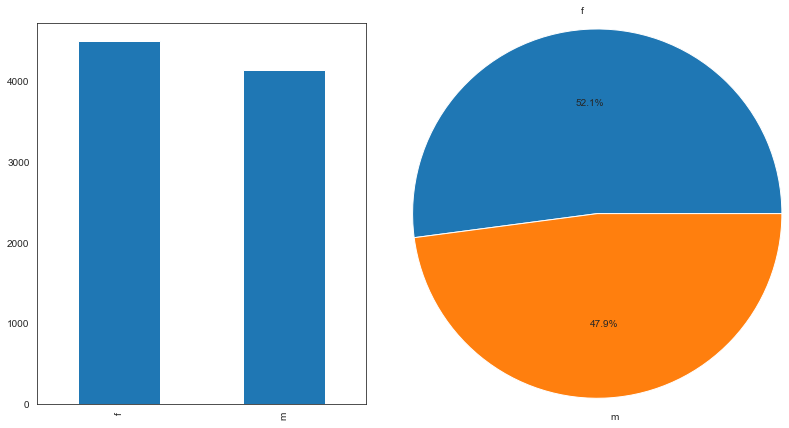

In [10]:
# La variable sex
#sns.histplot(data=customers, x="sex")
plt.figure(figsize=(13,7))
plt.subplot(121)
customers["sex"].value_counts().plot(kind="bar")
plt.subplot(122)
customers["sex"].value_counts().plot(kind="pie", autopct='%.1f%%', ylabel='', radius=1.4)
plt.show()

<div class="alert-info">
  <strong> La variable sex </strong> donne des infos sur le sexe des clients. Il y a presque autant de femmes que d'hommes.
</div>
<br>

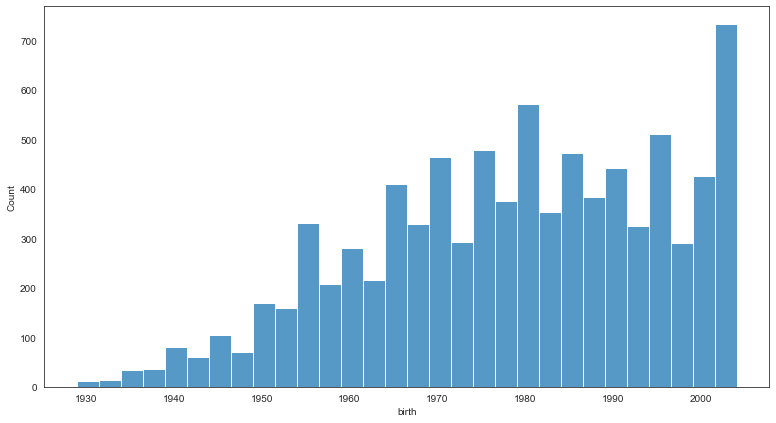

Année de naissance mini: 1929
Année de naissance max: 2004


In [11]:
# La variable birth
plt.figure(figsize=(13,7))
sns.histplot(customers["birth"])
plt.show()
print("Année de naissance mini:",customers["birth"].min())
print("Année de naissance max:",customers["birth"].max())

<div class="alert-info">
    <ul>
        <li><strong> La variable birth </strong> donne des infos sur l'anné de naissance du client.</li>
        <li>Il y a en total 76 années de naissance différentes comprises entre <strong> 1929 </strong> et <strong>2004</strong> </li> 
        <li> Les clients nés en 2004 sont très nombreux </li>
            </ul>
</div>
<br>

<strong> Nous pouvons déduire l'age des clients à partir de leurs années de naissance</strong>

,client_id,sex,birth,age_client
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79


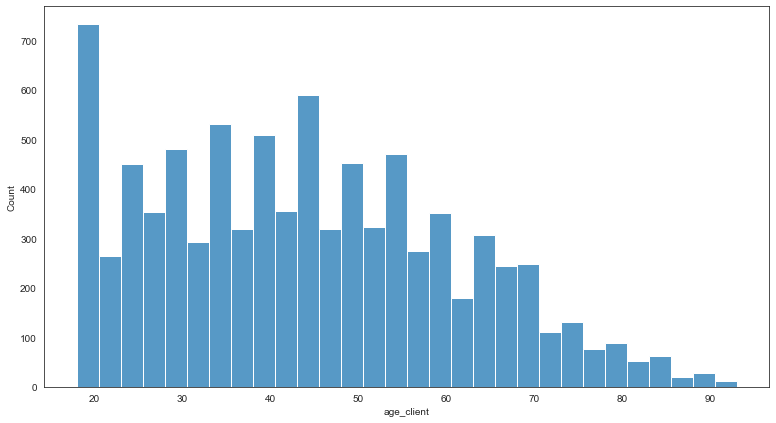

Age mini: 18
Age max: 93


In [12]:
# On déduit l'age des clients à partir de la date d'aujourd'hui
customers["age_client"] = dt.date.today().year - customers["birth"]
display(customers.head())

# on plot
plt.figure(figsize=(13,7))
sns.histplot(customers["age_client"])
plt.show()

print("Age mini:",customers["age_client"].min())
print("Age max:",customers["age_client"].max())

<div class="alert-info">
    <ul>
        <li>L'age des clients est compris entre <strong> 18 </strong> et <strong>93 ans</strong> </li> 
        <li> L'effectif au niveau des 18ans (age mini) est très élevé. </li>
            </ul>
</div>
<br>

<strong> Nous pouvons ensuite assigner à chaque client une catégorie en fonction de son age. </strong>

In [13]:
# On détermine des tranches d'age
customers["tranche_age"] = pd.cut(customers["age_client"], bins=[15,25,35,45,55,65,75,100], labels = ["16 - 25 ans","26 - 35 ans","36 - 45 ans","46 - 55 ans","56 - 65 ans","66 - 75 ans","76 ans - plus"])
display(customers.head())

,client_id,sex,birth,age_client,tranche_age
0,c_4410,f,1967,55,46 - 55 ans
1,c_7839,f,1975,47,46 - 55 ans
2,c_1699,f,1984,38,36 - 45 ans
3,c_5961,f,1962,60,56 - 65 ans
4,c_5320,m,1943,79,76 ans - plus


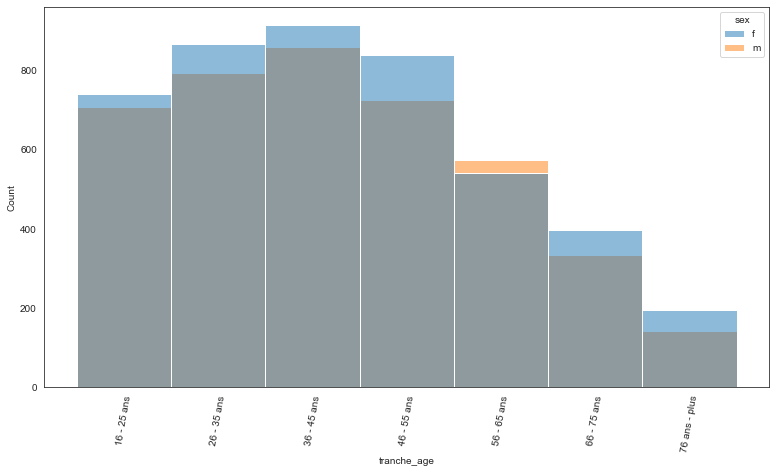

In [14]:
# La variable birth
plt.figure(figsize=(13,7))
sns.histplot(data =customers, x="tranche_age", hue='sex')

plt.xticks(rotation=80)
plt.show()

<div class="alert-info">
   <ul> 
       <li><strong> La variable tranche_age </strong> classe les clients dans des catégories en fonction de leur age.</li>
       <li> Les hommes de la tranche 56_65 sont plus nombreux que les femmes de la même tranche. </li>
       <li> Les femmes sont plus nombreuses sur toutes les autres tranches d'age </li>
   </ul>
</div>
<br>

<h2  style="margin: auto; 
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif"><a name="C4"> Products </a> </h2>

In [15]:
products = pd.read_csv("products.csv")
print('-'*70)
print('Apérçu des données :')
display(products.head())
print('-'*70, "\n")
print('Format des colonnes :',"\n")
print(products.dtypes, "\n")
print('-'*70,"\n")
print("Informations:","\n")
print(products.info())

----------------------------------------------------------------------
Apérçu des données :


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


---------------------------------------------------------------------- 

Format des colonnes : 

id_prod     object
price      float64
categ        int64
dtype: object 

---------------------------------------------------------------------- 

Informations: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB
None


<div class="alert-info">
    <ul>
      <li><strong>Products</strong> donne des informations sur les produits.</li>
      <li>On distingue 3 variables (dont une qui est quantitave) dans le jeu de données : price, categ, id_prod</li>
      <li>Il y a en total 3287 références de produits dans le jeu de données</li>
    </ul>
</div>
<br>

In [16]:
# La clé primaire
cles_potentielles(products)

['id_prod']
['id_prod', 'price']
['id_prod', 'categ']
['id_prod', 'price', 'categ']


In [17]:
check_nan(products, "id_prod")
check_duplicates(products,"id_prod")

La colonne id_prod ne contient aucune valeur manquante
La colonne id_prod ne contient pas de doublons


<div class="alert-info">
    <strong>id_prod</strong> répond aux critères d'une clé primaire conforme. Elle semble suivre le format "categ_xxxx"
</div>
<br>

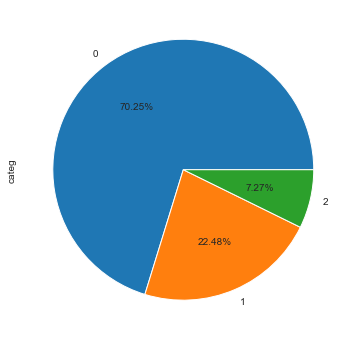

In [18]:
# La variable categ
plt.figure(figsize=(13,7))
products['categ'] = pd.Categorical(products['categ']) #On convertit au bon format
products["categ"].value_counts().plot(kind="pie", autopct='%1.2f%%', figsize=(9,6))
plt.show();

<div class="alert-info">
    <ul>
        <strong> Les produits sont classés selon 3 catégories : </strong>
        <li> Plus de 70 % des références sont de la catégorie 0.</li>
        <li> 22 % de la catégorie 1.</li>
        <li> 7 % de la catégorie 2.</li>
    </ul>
</div>
<br>

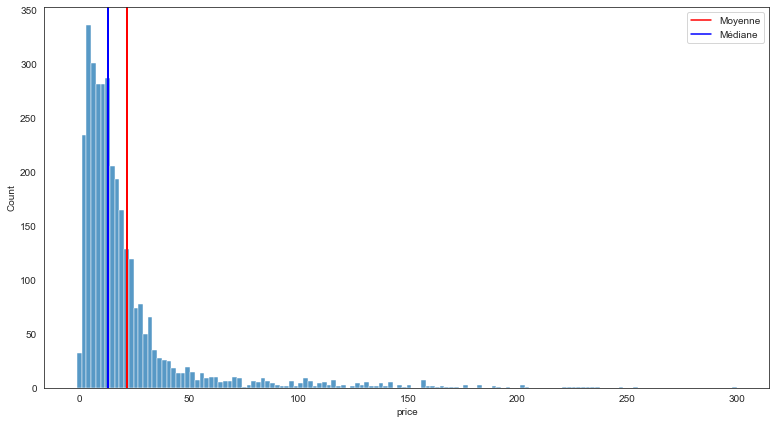

,count,mean,std,min,25%,50%,75%,max
price,3287.0,21.856641,29.847908,-1.0,6.99,13.06,22.99,300.0


In [19]:
# La variable price

plt.figure(figsize=(13,7))
sns.histplot(data =products, x="price" );
#products["price"].hist(bins=60)

plt.axvline(products["price"].mean(), color='r', linewidth=2)
plt.axvline(products["price"].median(), color='b', linewidth=2)
import matplotlib.lines as mlines
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne"),mlines.Line2D([], [], color='b',markersize=15, label=u"Médiane")])

plt.show()

display(products.describe().T)

<div class="alert-info">
    <ul>
        <li> Le prix moyen est de 21.86 </li>
        <li> 50% des prix sont en dessous de 13.06 avec un prix max de 300. Nous avons donc une distribution très étalée sur la droite avec un écart-type de 29.84 et certainement des outliers.</li>
    </ul>
</div>
<br>

<div class="alert-warning">
    Le prix minimum est égale à -1. Le prix ne peut être une valeur négative.
</div>
<br>

In [20]:
# On vérifie les valeurs négatives sur la variable price
products[products["price"]<0]

,id_prod,price,categ
731,T_0,-1.0,0


Le produit T_0 est la seule valeur négative sur price. Étant donné que le prix d'un produit ne peut être négatif, on peut conclure que le produit T_0 est une valeur fausse. 

---------------------------------------------------------------------------------------------------- 



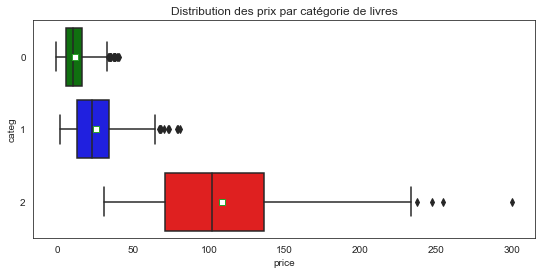

---------------------------------------------------------------------------------------------------- 



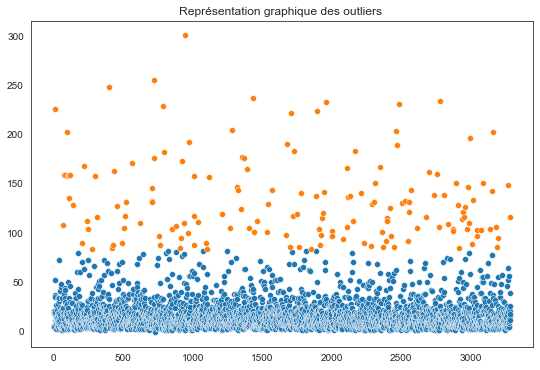

---------------------------------------------------------------------------------------------------- 

Apérçu des données :


,id_prod,price,categ,zscore
10,2_228,225.17,2,6.811645
64,2_89,107.99,2,2.885742
73,2_225,157.99,2,4.560901
79,2_187,157.99,2,4.560901
95,2_128,201.74,2,6.026666


Nombre d'outliers détectés : 157


In [21]:
# On analyse les outliers sur la variable price.
print('-'*100, "\n")
plt.figure(figsize=(9,4))
palette = ['g','b','r']
meanprops={ "marker" : "s", "markerfacecolor" : "w"}
sns.boxplot(data=products, y='categ', x='price', orient='h', showmeans=True, palette=palette, meanprops=meanprops)
plt.title('Distribution des prix par catégorie de livres');
plt.show()
outliers = products.copy()
outliers["zscore"] = (outliers["price"] - outliers["price"].mean())/outliers["price"].std()
the_ok = outliers[(outliers["zscore"] <= 2) & (outliers["zscore"] >= -2)]
the_outliers = outliers[outliers["zscore"].abs() >2];
print('-'*100, "\n")
plt.figure(figsize=(9,6))
sns.scatterplot(x=the_ok["price"].index, y=the_ok["price"].values,)
sns.scatterplot(x=the_outliers["price"].index, y=the_outliers["price"].values)
plt.title('Représentation graphique des outliers ');
plt.show()
print('-'*100, "\n")
print('Apérçu des données :')
display(the_outliers.head())
print("Nombre d'outliers détectés :", len(the_outliers))


<h2 style="margin: auto; 
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif"
    ><a name="C5"> Transactions </a></h2>

In [22]:
transactions = pd.read_csv("transactions.csv")
print('-'*70)
print('Apérçu des données :')
display(transactions.head())
print('-'*70, "\n")
print('Format des colonnes :',"\n")
print(transactions.dtypes, "\n")
print('-'*70,"\n")
print("Informations:","\n")
print(transactions.info())


----------------------------------------------------------------------
Apérçu des données :


,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


---------------------------------------------------------------------- 

Format des colonnes : 

id_prod       object
date          object
session_id    object
client_id     object
dtype: object 

---------------------------------------------------------------------- 

Informations: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB
None



<div class="alert-info">
    <ul>
        <li><strong>Transactions</strong> donne des informations sur des opérations de vente. </li>
        <li> Il y a 4 variables dans le jeu de données.</li> 
        <li> Chaque ligne représente une opération de vente à une date donnée</li>
        <li> Il y a en total 679532 transactions enregistrés</li>
        <li> Il n'y a aucune valeur manquante dans le dataframe</li>..
    </ul>
</div>
<br>

In [23]:
# La clé primaire
cles_potentielles(transactions)

Aucune clé primaire, simple ou composée, n'a pu être trouvée ! Il y a forcément des doublons.


In [24]:
doublons = transactions[transactions.duplicated()]
doublons

,id_prod,date,session_id,client_id
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
139339,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [25]:
print("Les doublons concernent les produits :", doublons["id_prod"].unique())
print("Les doublons concernent les clients :", doublons["client_id"].unique())
print("Les doublons concernent les dates :", doublons["date"].str.split(".", expand=True)[0].unique())
print("Les doublons concernent les sessions :", doublons["session_id"].str.split(".", expand=True)[0].unique())

Les doublons concernent les produits : ['T_0']
Les doublons concernent les clients : ['ct_1' 'ct_0']
Les doublons concernent les dates : ['test_2021-03-01 02:30:02']
Les doublons concernent les sessions : ['s_0']



<div class="alert-info">
    <ul>
       <strong> Les clients ct_1 et ct_0 sont des clients test qui ont effectués des transactions concernant un produit test (T_0) à une date test ('test_2021-03-01 02:30:02') pendant une sessions test (s_0). </strong>
    </ul>
</div>
<br>

In [26]:
transactions_test = transactions[transactions["id_prod"] =="T_0"]
display(transactions_test.head())
print("il y au total", len(transactions_test), "transactions test")

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0


il y au total 200 transactions test


In [27]:
# On écarte les transactions test
transactions = transactions[transactions["id_prod"] !="T_0"]

In [28]:
# La clé primaire
cles_potentielles(transactions)

['date']
['id_prod', 'date']
['date', 'session_id']
['date', 'client_id']
['id_prod', 'date', 'session_id']
['id_prod', 'date', 'client_id']
['date', 'session_id', 'client_id']
['id_prod', 'date', 'session_id', 'client_id']


In [29]:
check_nan(transactions, "date")
check_duplicates(transactions,"date")

La colonne date ne contient aucune valeur manquante
La colonne date ne contient pas de doublons


<div class="alert-info">
    <strong>La colonne date</strong> répond aux critères d'une clé primaire conforme.
</div>
<br>

In [30]:
# On separe l'heure de la date
transactions['time'] = pd.to_datetime(transactions['date']).dt.time
transactions['date']= pd.to_datetime(transactions['date']).dt.date

# On convertit la date au format adapté
transactions['date'] = pd.to_datetime(transactions['date'])

In [31]:
#On extrait le mois et l'année des transactions
transactions['periode'] = transactions['date'].dt.to_period("m")
transactions['annee'] = pd.to_datetime(transactions['date']).dt.year

In [32]:
print('-'*70)
print('Apérçu des données :')
display(transactions.head())
print('-'*70)
display(transactions.info())

----------------------------------------------------------------------
Apérçu des données :


,id_prod,date,session_id,client_id,time,periode,annee
0,0_1518,2022-05-20,s_211425,c_103,13:21:29.043970,2022-05,2022
1,1_251,2022-02-02,s_158752,c_8534,07:55:19.149409,2022-02,2022
2,0_1277,2022-06-18,s_225667,c_6714,15:44:33.155329,2022-06,2022
3,2_209,2021-06-24,s_52962,c_6941,04:19:29.835891,2021-06,2021
4,0_1509,2023-01-11,s_325227,c_4232,08:22:08.194479,2023-01,2023


----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   time        679332 non-null  object        
 5   periode     679332 non-null  period[M]     
 6   annee       679332 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4), period[M](1)
memory usage: 41.5+ MB


None

<div class="alert-info">
    <ul>
        <li><strong>Transactions</strong> est une table de liaison qui relie products grâce à la clé étrangère "id_prod" et customers grâce à la clé "client_id". </li>
        <li> Après nettoyage, il ne reste plus que <strong>679332 transactions </strong> dans le fichier.</li>
    </ul>
</div>
<br>

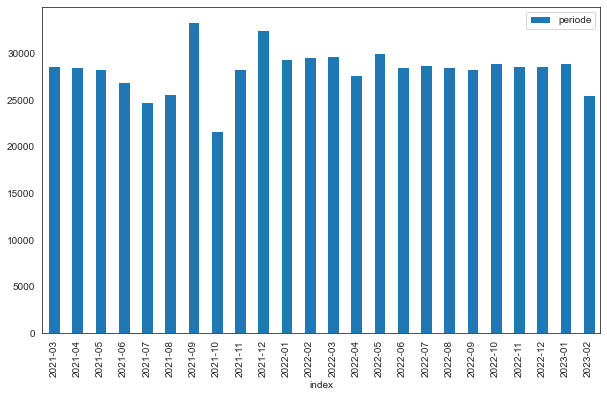

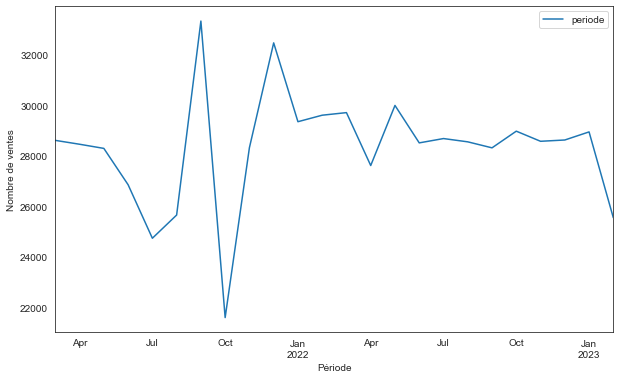

il y a eu 679332 ventes entre 2021-03 et 2023-02


In [33]:
transactions["periode"].value_counts().reset_index().set_index('index').sort_values("index").plot(kind="bar",  figsize=(10,6))
transactions["periode"].value_counts().reset_index().set_index('index').sort_values("index").plot( figsize=(10,6))
plt.xlabel("Période")
plt.ylabel("Nombre de ventes")
plt.show()
print("il y a eu 679332 ventes entre", transactions["periode"].min(), "et", transactions["periode"].max())

<h2 style="margin: auto; 
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif"><a name="C6"> Fusion </a></h2>

In [34]:
df = transactions.merge(customers, how='left', on='client_id').merge(products, how='left', on='id_prod')
print('-'*70)
print('Apérçu des données :')
display(df.head())
print('-'*70, "\n")
print('Format des colonnes :',"\n")
print(df.dtypes, "\n")
print('-'*70,"\n")
print("Informations:","\n")
print(df.info())

----------------------------------------------------------------------
Apérçu des données :


,id_prod,date,session_id,client_id,time,periode,annee,sex,birth,age_client,tranche_age,price,categ
0,0_1518,2022-05-20,s_211425,c_103,13:21:29.043970,2022-05,2022,f,1986,36,36 - 45 ans,4.18,0
1,1_251,2022-02-02,s_158752,c_8534,07:55:19.149409,2022-02,2022,m,1988,34,26 - 35 ans,15.99,1
2,0_1277,2022-06-18,s_225667,c_6714,15:44:33.155329,2022-06,2022,f,1968,54,46 - 55 ans,7.99,0
3,2_209,2021-06-24,s_52962,c_6941,04:19:29.835891,2021-06,2021,m,2000,22,16 - 25 ans,69.99,2
4,0_1509,2023-01-11,s_325227,c_4232,08:22:08.194479,2023-01,2023,m,1980,42,36 - 45 ans,4.99,0


---------------------------------------------------------------------- 

Format des colonnes : 

id_prod                object
date           datetime64[ns]
session_id             object
client_id              object
time                   object
periode             period[M]
annee                   int64
sex                    object
birth                   int64
age_client              int64
tranche_age          category
price                 float64
categ                category
dtype: object 

---------------------------------------------------------------------- 

Informations: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id_prod      679332 non-null  object        
 1   date         679332 non-null  datetime64[ns]
 2   session_id   679332 non-null  object        
 3   client_id    679332 non-null  object      

On remarque des valeurs manquantes au niveau du prix et de la catégorie.

<div class="alert-warning">
    <strong> Il y a des valeurs manquantes au niveau du prix et de la catégorie.</strong>
</div>
<br>

In [35]:
check_nan(df, "price")
check_nan(df, "categ")

La colonne price contient  221  valeurs manquantes.
La colonne categ contient  221  valeurs manquantes.


In [36]:
mask_nans = (df['price'].isnull()) | (df['categ'].isnull())
print("Les valeurs manquantes concernent les produits suivants :", df[mask_nans]["id_prod"].unique())

Les valeurs manquantes concernent les produits suivants : ['0_2245']


In [37]:
# On vérifie si ce produit est bien repertorié dans products
products[products["id_prod"]=="0_2245" ]

,id_prod,price,categ



<div class="alert-info">
    <ul>
        <li>221 transactions concernent le produit 0_2245 qui n'est pas repertorié dans products. </li>
        <li>L'id_ prod est du format categ_xxxx => le produit 0_2245 est donc un produit de la catégorie 0.</li>
    </ul>
</div>
<br>

In [38]:
# On calcule le prix moyen de la catégorie 0
categ0_mean = round(df[df["categ"]==0]["price"].mean(),2)

# On impute les prix du produit 0_2245 par le prix moyen de la catégorie 0
df.loc[df["id_prod"]=="0_2245", "price"] = categ0_mean

# On assigne 0 au niveau de la colonne categ des transactions concernant le produit 0_2245.
df.loc[df["id_prod"]=="0_2245", "categ"] = 0

# On vérifie les modifications enregistrées.
df[df["id_prod"]=="0_2245"].head()

,id_prod,date,session_id,client_id,time,periode,annee,sex,birth,age_client,tranche_age,price,categ
2633,0_2245,2022-09-23,s_272266,c_4746,07:22:38.636773,2022-09,2022,m,1940,82,76 ans - plus,10.64,0
10103,0_2245,2022-07-23,s_242482,c_6713,09:24:14.133889,2022-07,2022,f,1963,59,56 - 65 ans,10.64,0
11723,0_2245,2022-12-03,s_306338,c_5108,03:26:35.696673,2022-12,2022,m,1978,44,36 - 45 ans,10.64,0
15670,0_2245,2021-08-16,s_76493,c_1391,11:33:25.481411,2021-08,2021,m,1991,31,26 - 35 ans,10.64,0
16372,0_2245,2022-07-16,s_239078,c_7954,05:53:01.627491,2022-07,2022,m,1973,49,46 - 55 ans,10.64,0


<h2 style="margin: auto; 
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif"><a name="C7"> Conclusion </a></h2>

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id_prod      679332 non-null  object        
 1   date         679332 non-null  datetime64[ns]
 2   session_id   679332 non-null  object        
 3   client_id    679332 non-null  object        
 4   time         679332 non-null  object        
 5   periode      679332 non-null  period[M]     
 6   annee        679332 non-null  int64         
 7   sex          679332 non-null  object        
 8   birth        679332 non-null  int64         
 9   age_client   679332 non-null  int64         
 10  tranche_age  679332 non-null  category      
 11  price        679332 non-null  float64       
 12  categ        679332 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(1), int64(3), object(5), period[M](1)
memory usage: 63.5+ MB


In [40]:
# On exporte le df final
df.to_csv("df_final.csv", encoding='utf-8', index=False)

Nous avons décelé plusieurs types d'erreurs, de valeurs aberrantes et atypiques durant le processus de préparation des données. A chaque erreur ou outlier détecté, nous avons apporté une solution adaptée tout en tenant compte de l'objectif du projet. De plus, nous avons rajouté pusieurs variables qui seront utiles pour la suite du projet.


Bilan des modifications apportées :
- les variables tranche_age, année et période ont été rajoutées au jeu de données.
- T_0 qui est un produit test a été écarté de l'analyse (soit 200 transactions concernant les tests)
- 0_2245 n'étant pas repertorié dans le fichier products, son prix (NaN) a été remplacé par le prix moyen de la catégorie 0.
- 157 outliers ont été détectés sur la varible price.
- la colonne contenant la variable date est convertie dans le bon format.

Suite au rapprochement des données, le dataframe final comprend 679332 entrées. Celui-ci est exporté sous le nom df_final.csv pour la suite de l'analyse...